In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

# visualizations
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

import plotly.io as pio
pio.renderers.default = "notebook_connected"

## 1. Introduction
In this notebook we'll explore the "Global Data on Sustainable Energy (2000-2020)" dataset.
We'll perform data cleaning, visualization, statistics and transformations.

The original dataset can be found on Kaggle, here: [Global Data on Sustainable Energy (2000-2020)](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy)

## Description
Before we start coding we'll take a quick look at the dataset's description.

From the Kaggle publication:
>```Uncover this comprehensive dataset showcasing sustainable energy indicators and other useful factors across all countries from 2000 to 2020. Dive into vital aspects such as electricity access, renewable energy, carbon emissions, energy intensity, Financial flows, and economic growth. Compare nations, track progress towards Sustainable Development Goal 7, and gain profound insights into global energy consumption patterns over time. ```

### Features
1. `Entity`: The name of the country or region for which the data is reported.
2. `Year`: The year for which the data is reported, ranging from 2000 to 2020.
3. `Access` to electricity (% of population): The percentage of population with access to electricity.
4. `Access to clean fuels for cooking (% of population)`: The percentage of the population with primary reliance on clean fuels.
5. `Renewable-electricity-generating-capacity-per-capita`: Installed Renewable energy capacity per person
6. `Financial flows to developing countries (US $)`: Aid and assistance from developed countries for clean energy projects.
7. `Renewable energy share in total final energy consumption (%)`: Percentage of renewable energy in final energy consumption.
8. `Electricity from fossil fuels (TWh)`: Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.
9. `Electricity from nuclear (TWh)`: Electricity generated from nuclear power in terawatt-hours.
10. `Electricity from renewables (TWh)`: Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.
11. `Low-carbon electricity (% electricity)`: Percentage of electricity from low-carbon sources (nuclear and renewables).
12. `Primary energy consumption per capita (kWh/person)`: Energy consumption per person in kilowatt-hours.
13. `Energy intensity level of primary energy (MJ/$2011 PPP GDP)`: Energy use per unit of GDP at purchasing power parity.
14. `Value_co2_emissions (metric tons per capita)`: Carbon dioxide emissions per person in metric tons.
15. `Renewables (% equivalent primary energy)`: Equivalent primary energy that is derived from renewable sources.
16. `GDP growth (annual %)`: Annual GDP growth rate based on constant local currency.
17. `GDP per capita`: Gross domestic product per person.
18. `Density (P/Km2)`: Population density in persons per square kilometer.
19. `Land Area (Km2)`: Total land area in square kilometers.
20. `Latitude`: Latitude of the country's centroid in decimal degrees.
21. `Longitude`: Longitude of the country's centroid in decimal degrees.


### Potential Use Cases
- Energy Consumption Prediction: Predict future energy usage, aid planning, and track SDG 7 progress.
- Carbon Emission Forecasting: Forecast CO2 emissions, support climate strategies.
- Energy Access Classification: Categorize regions for infrastructure development, understand sustainable energy's role.
- Sustainable Development Goal Tracking: Monitor progress towards Goal 7, evaluate policy impact.
- Energy Equity Analysis: Analyze access, density, and growth for equitable distribution.
- Energy Efficiency Optimization: Identify intensive areas for environmental impact reduction.
- Renewable Energy Potential Assessment: Identify regions for green investments based on capacity.
- Renewable Energy Investment Strategies: Guide investors towards sustainable opportunities.



I believe it's important to give credit to the authors who worked on this dataset
#### Authors of the dataset
`Ansh Tanwar`



In [3]:
# Read the dataset (csv format)
data = pd.read_csv('global-data-on-sustainable-energy.csv')

In [4]:
# 5 rows
data.sample(5)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
3569,Vanuatu,2004,29.310175,15.1,2.94,NaN,64.06,0.04,0.0,0.00,...,1804.73190,3.03,70.000000,NaN,3.987393,1788.122206,25,12189.0,-15.376706,166.959158
572,Cambodia,2005,20.500000,6.7,1.02,1250000.0,79.24,0.86,0.0,0.04,...,909.82135,5.73,2660.000086,NaN,13.250087,474.111192,95,181035.0,12.565679,104.990963
3237,Tajikistan,2008,98.624140,65.3,570.91,34870000.0,54.61,0.35,0.0,16.64,...,8418.19500,6.32,3039.999962,NaN,7.899998,715.865706,68,144100.0,38.861034,71.276093
2140,Mauritius,2018,99.448845,97.0,186.25,NaN,9.19,2.45,0.0,0.52,...,21929.62700,2.15,4130.000114,NaN,3.759677,11208.343820,626,2040.0,-20.348404,57.552152
2510,Oman,2017,100.000000,100.0,1.76,NaN,0.00,33.96,0.0,0.02,...,77804.74000,8.07,71930.000310,0.011463,0.304058,17329.185460,16,309500.0,21.473533,55.975413


## 2. EDA
We'll start our EDA with a few steps:
1. Modify column names (for data cleaning)
2. Quick look at our data and its types
3. Identify interesting data pairs
4. Start plotting

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [6]:
data.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [7]:
data.corr()

/var/folders/hc/kstfp85j47ldl6qsl8vyt4j40000gn/T/ipykernel_19081/2627137660.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
Year,1.000000,0.124890,0.073292,0.104365,0.141820,-0.029384,0.032615,-0.004820,0.073935,0.030126,0.004196,-0.161605,0.024759,0.104767,-0.192566,0.135399,-0.001629,0.003507,0.000944
Access to electricity (% of population),0.124890,1.000000,0.866554,0.270423,0.060478,-0.784514,0.123999,0.128713,0.138057,-0.151062,0.454870,-0.252949,0.126988,0.058195,-0.112071,0.418459,0.054964,0.420548,-0.102857
Access to clean fuels for cooking,0.073292,0.866554,1.000000,0.227962,0.042204,-0.791740,0.100752,0.163473,0.124486,-0.120110,0.551347,-0.194884,0.095629,0.063131,-0.145301,0.545165,0.074630,0.432700,-0.131847
Renewable-electricity-generating-capacity-per-capita,0.104365,0.270423,0.227962,1.000000,0.003677,0.054821,0.051483,0.080168,0.147768,0.427264,0.000290,-0.056445,0.046755,0.718511,-0.013462,0.017266,0.070355,-0.041691,-0.025587
Financial flows to developing countries (US $),0.141820,0.060478,0.042204,0.003677,1.000000,-0.005519,0.139238,0.127840,0.122362,-0.002716,0.009860,-0.004231,0.126609,-0.023016,0.003324,0.067525,0.141528,0.021782,0.029141
Renewable energy share in the total final energy consumption (%),-0.029384,-0.784514,-0.791740,0.054821,-0.005519,1.000000,-0.134888,-0.136525,-0.068779,0.467862,-0.429362,0.247050,-0.132715,0.768166,0.075236,-0.370648,-0.045395,-0.330140,0.018284
Electricity from fossil fuels (TWh),0.032615,0.123999,0.100752,0.051483,0.139238,-0.134888,1.000000,0.646716,0.845067,-0.063773,0.105529,0.030998,0.989741,-0.088586,0.020956,0.107793,0.627682,0.110994,0.045413
Electricity from nuclear (TWh),-0.004820,0.128713,0.163473,0.080168,0.127840,-0.136525,0.646716,1.000000,0.492011,0.071715,0.180833,-0.007496,0.598495,-0.057667,-0.048455,0.231349,0.473280,0.177961,-0.087111
Electricity from renewables (TWh),0.073935,0.138057,0.124486,0.147768,0.122362,-0.068779,0.845067,0.492011,1.000000,0.091451,0.119760,0.009425,0.856270,0.166374,-0.002531,0.139674,0.704884,0.112833,-0.016380
Low-carbon electricity (% electricity),0.030126,-0.151062,-0.120110,0.427264,-0.002716,0.467862,-0.063773,0.071715,0.091451,1.000000,-0.119386,0.047489,-0.054515,0.782388,-0.015196,0.007945,0.044866,-0.029134,-0.045336


In [8]:
print(f"Number of columns: {data.columns.__len__()}")
print(data.columns)

Number of columns: 21
Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


As we can see, we've got 21 columns, most of which have long names, so we'll start by modifying the column names to names without spaces or special characters

In [9]:
# Copy the dataset
dataset = data.copy()
dataset.columns = ['country', 
                   'year', 
                   'population_access_to_electricity', 
                   'access_to_clean_cooking_fuels', 
                   'renewable_electricity_generating_capacity_per_capita',
                   'financial_flows_to_developing_countries_usd',
                   'renewable_energy_percentage_total_energy_consumption',
                   'electricity_from_fossil_fuels_twh',
                   'electricity_from_nuclear_twh',
                   'electricity_from_renewables_twh',
                   'low_carbon_electricity_percentage',
                   'primary_consumption_per_capita_kwh_person',
                   'energy_intensity_level_primary_energy',
                   'value_co2_emissions_kt_by_country',
                   'renewables_percentage_equiv_primary_energy',
                   'gdp_growth',
                   'gdp_per_capita',
                   'population_denisty_sqkm',
                   'land_area_sqkm',
                   'latitude',
                   'longitude']
dataset.sample(5)

,country,year,population_access_to_electricity,access_to_clean_cooking_fuels,renewable_electricity_generating_capacity_per_capita,financial_flows_to_developing_countries_usd,renewable_energy_percentage_total_energy_consumption,electricity_from_fossil_fuels_twh,electricity_from_nuclear_twh,electricity_from_renewables_twh,...,primary_consumption_per_capita_kwh_person,energy_intensity_level_primary_energy,value_co2_emissions_kt_by_country,renewables_percentage_equiv_primary_energy,gdp_growth,gdp_per_capita,population_denisty_sqkm,land_area_sqkm,latitude,longitude
1055,Equatorial Guinea,2005,65.56535,20.8,7.47,NaN,7.10,0.19,0.0,0.01,...,26154.95700,2.70,8319.999695,NaN,16.748701,10963.406380,50,28051.0,1.650801,10.267895
1986,Madagascar,2011,14.30000,0.9,6.03,7370000.0,84.60,0.66,0.0,0.68,...,511.36972,6.34,2190.000057,NaN,1.578427,531.265432,48,587041.0,-18.766947,46.869107
3342,Tunisia,2008,99.40000,99.0,7.94,235950000.0,14.61,13.44,0.0,0.07,...,9715.21800,3.91,25250.000000,NaN,4.237782,4307.580023,76,163610.0,33.886917,9.537499
2849,Samoa,2020,100.00000,36.5,141.80,NaN,NaN,0.10,0.0,0.06,...,7222.19040,NaN,NaN,NaN,-2.592608,4067.843459,70,2831.0,-13.759029,-172.104629
1134,Ethiopia,2000,12.70000,0.9,6.12,1500000.0,95.55,0.06,0.0,1.64,...,287.99124,21.38,3560.000000,NaN,6.073217,124.460791,115,1104300.0,9.145000,40.489673


Now that column naming is out of our way, let's look at our data types

In [10]:
dataset.dtypes

country                                                  object
year                                                      int64
population_access_to_electricity                        float64
access_to_clean_cooking_fuels                           float64
renewable_electricity_generating_capacity_per_capita    float64
financial_flows_to_developing_countries_usd             float64
renewable_energy_percentage_total_energy_consumption    float64
electricity_from_fossil_fuels_twh                       float64
electricity_from_nuclear_twh                            float64
electricity_from_renewables_twh                         float64
low_carbon_electricity_percentage                       float64
primary_consumption_per_capita_kwh_person               float64
energy_intensity_level_primary_energy                   float64
value_co2_emissions_kt_by_country                       float64
renewables_percentage_equiv_primary_energy              float64
gdp_growth                              

For some reason the dtype for `population_density_sqkm` is presented as an object (string) but when taking a quick look at the data, we can see it's numeric, let's convert the dtype of that column to float64

In [11]:
dataset['population_denisty_sqkm'] = dataset['population_denisty_sqkm'].str.replace(',', '')
dataset['population_denisty_sqkm'] = pd.to_numeric(dataset['population_denisty_sqkm'])

In [12]:
dataset.dtypes

country                                                  object
year                                                      int64
population_access_to_electricity                        float64
access_to_clean_cooking_fuels                           float64
renewable_electricity_generating_capacity_per_capita    float64
financial_flows_to_developing_countries_usd             float64
renewable_energy_percentage_total_energy_consumption    float64
electricity_from_fossil_fuels_twh                       float64
electricity_from_nuclear_twh                            float64
electricity_from_renewables_twh                         float64
low_carbon_electricity_percentage                       float64
primary_consumption_per_capita_kwh_person               float64
energy_intensity_level_primary_energy                   float64
value_co2_emissions_kt_by_country                       float64
renewables_percentage_equiv_primary_energy              float64
gdp_growth                              

Perfect!

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'population_access_to_electricity'}>,
        <Axes: title={'center': 'access_to_clean_cooking_fuels'}>,
        <Axes: title={'center': 'renewable_electricity_generating_capacity_per_capita'}>],
       [<Axes: title={'center': 'financial_flows_to_developing_countries_usd'}>,
        <Axes: title={'center': 'renewable_energy_percentage_total_energy_consumption'}>,
        <Axes: title={'center': 'electricity_from_fossil_fuels_twh'}>,
        <Axes: title={'center': 'electricity_from_nuclear_twh'}>],
       [<Axes: title={'center': 'electricity_from_renewables_twh'}>,
        <Axes: title={'center': 'low_carbon_electricity_percentage'}>,
        <Axes: title={'center': 'primary_consumption_per_capita_kwh_person'}>,
        <Axes: title={'center': 'energy_intensity_level_primary_energy'}>],
       [<Axes: title={'center': 'value_co2_emissions_kt_by_country'}>,
        <Axes: title={'center': 'renewables_percentage_

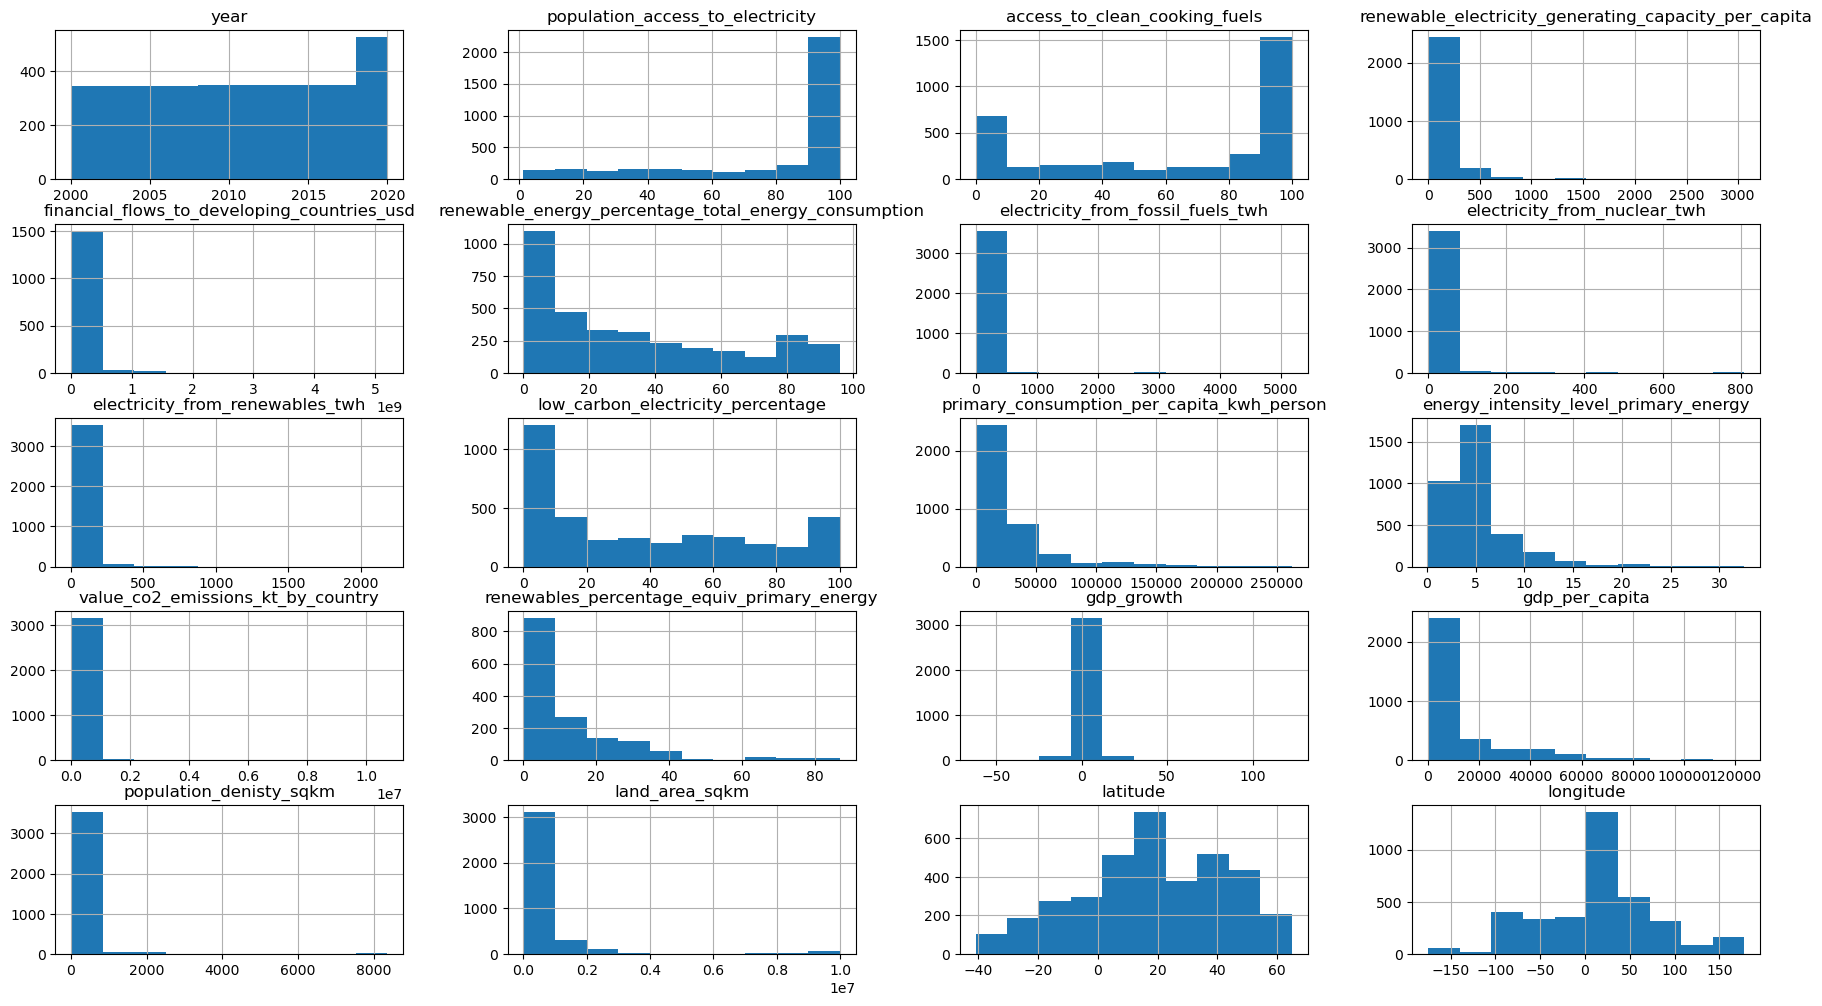

In [13]:
dataset.hist(figsize=(22, 12))

Now lets explore our data further by looking at interesting pairs:
1. CO2 Emissions by year (global)
2. Top 10 CO2 emitting countries
3. Top GDP Growth countries by year
4. Top 10 GDP Per Capita countries (latest - 2019)

First, we'll drop the year 2020 because it lots of missing values when it comes to CO2 emission, we can skip using it and continue to explore 2000 - 2019

In [14]:
dataset_without_2020 = dataset.drop(dataset[dataset['year'] == 2020].index)

<Axes: title={'center': 'Global CO2 emission from 2000 - 2019'}, xlabel='year'>

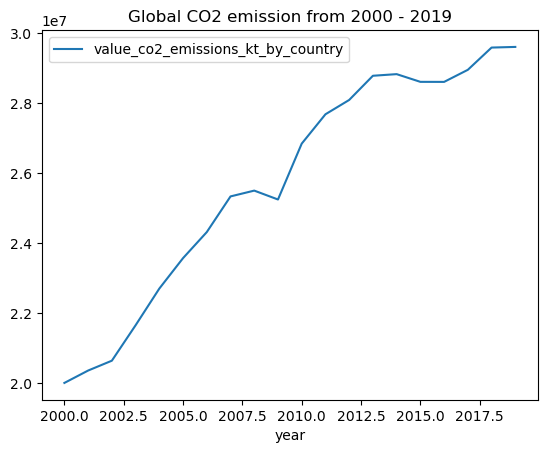

In [15]:
# Retrieve the sum of the global co2 emissions and group them by year
emissions_by_year = dataset_without_2020.groupby('year')['value_co2_emissions_kt_by_country'].sum().reset_index()
# We're dropping the year 2020 from global emissions 
emissions_by_year.plot(x='year', y='value_co2_emissions_kt_by_country', title='Global CO2 emission from 2000 - 2019')

We can clearly see a year-by-year increase in CO2 emissions.

Moreover, we can calculate the % rate of change in emissions by year

In [16]:
# Calculate the percentage change for the co2 emission column
rate_of_co2_change = emissions_by_year.pct_change(axis=0)['value_co2_emissions_kt_by_country'].reset_index()
# Modify the values to represent percentage change from 0 to 100
rate_of_co2_change['value_co2_emissions_kt_by_country'] = rate_of_co2_change['value_co2_emissions_kt_by_country']*100
# Format the column
rate_of_co2_change['value_co2_emissions_kt_by_country'].map('{:.2f}%'.format)


# Note: index 0 (year = 2000) is NaN due to no previous data for pct_change to calculate on

0       nan%
1      1.77%
2      1.38%
3      4.91%
4      4.85%
5      3.84%
6      3.16%
7      4.20%
8      0.66%
9     -1.00%
10     6.33%
11     3.13%
12     1.48%
13     2.46%
14     0.16%
15    -0.76%
16    -0.00%
17     1.21%
18     2.20%
19     0.06%
Name: value_co2_emissions_kt_by_country, dtype: object

#### Top CO2 emitting countries, overall.

<Axes: xlabel='country'>

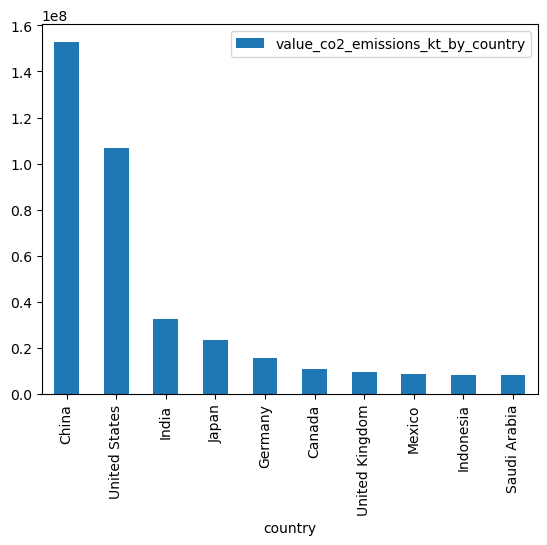

In [17]:
top_10_emitting_countries = dataset_without_2020.groupby('country')['value_co2_emissions_kt_by_country'].sum().reset_index()
top_10_emitting_countries = top_10_emitting_countries.sort_values('value_co2_emissions_kt_by_country', ascending=False)[:10]
top_10_emitting_countries.plot(kind='bar', x='country', y='value_co2_emissions_kt_by_country')

In [18]:
top_10_emitting_countries = dataset_without_2020.groupby('country')['gdp_per_capita'].sum().reset_index()
top_10_emitting_countries = top_10_emitting_countries.sort_values('gdp_per_capita', ascending=False)[:10]

print(top_10_emitting_countries)

            country  gdp_per_capita
94       Luxembourg    1.937872e+06
19          Bermuda    1.844811e+06
119          Norway    1.498569e+06
155     Switzerland    1.409107e+06
130           Qatar    1.192397e+06
30   Cayman Islands    1.111508e+06
77          Ireland    1.066557e+06
43          Denmark    1.052433e+06
73          Iceland    1.033933e+06
169   United States    9.880196e+05


#### GDP Growth

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


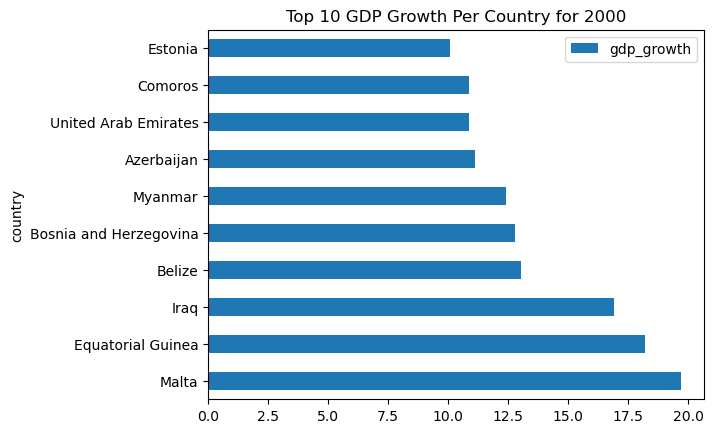

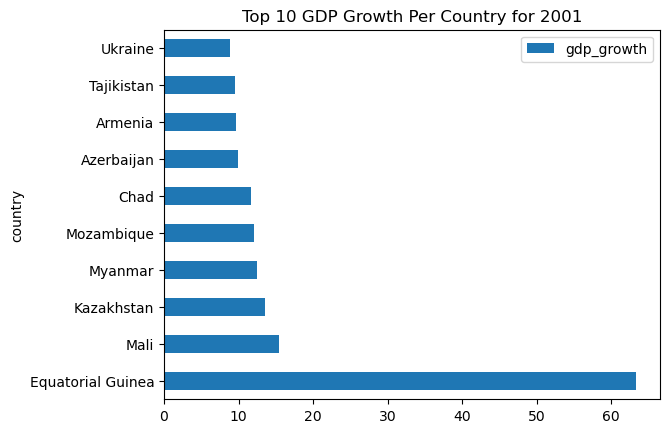

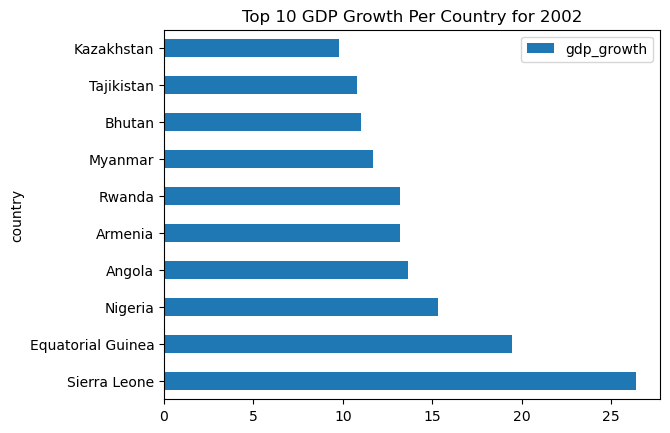

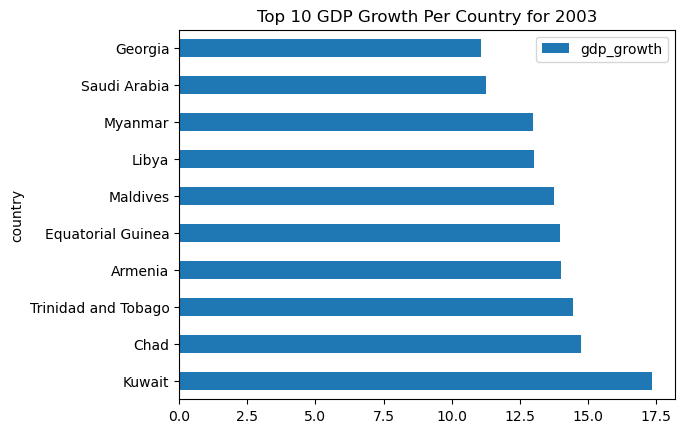

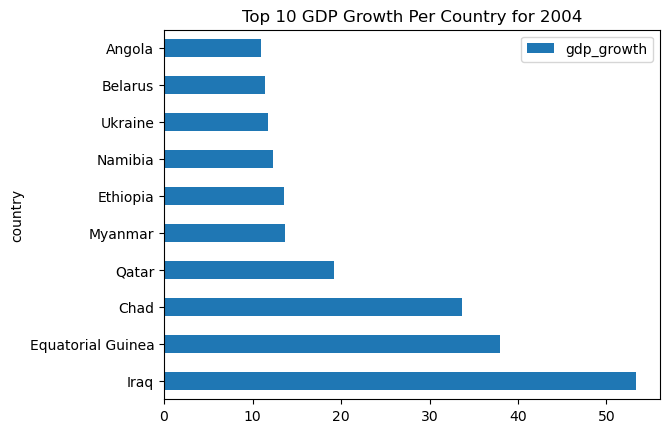

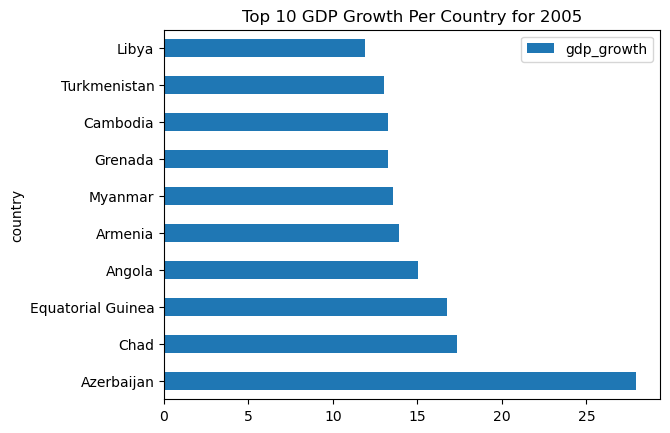

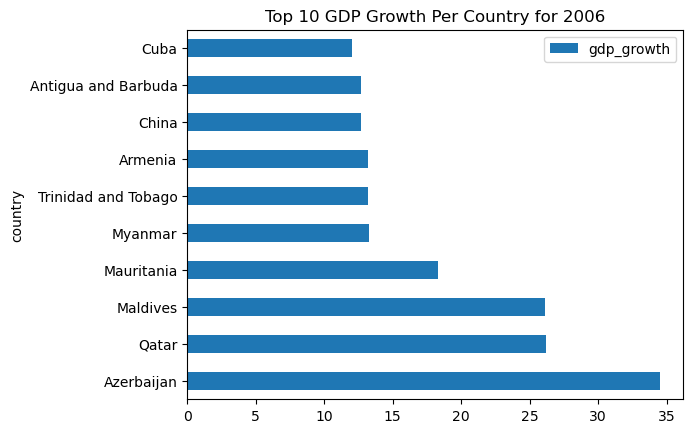

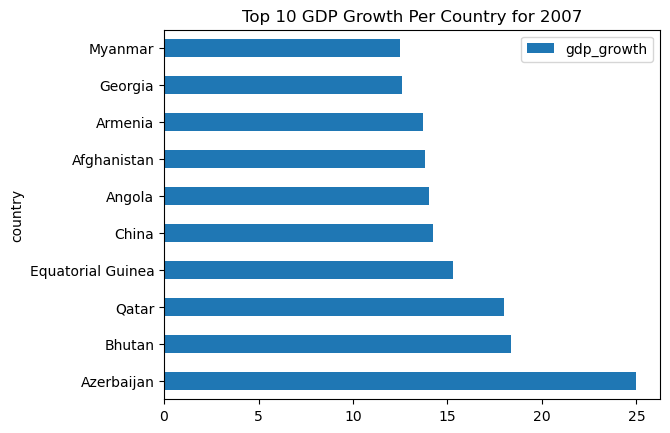

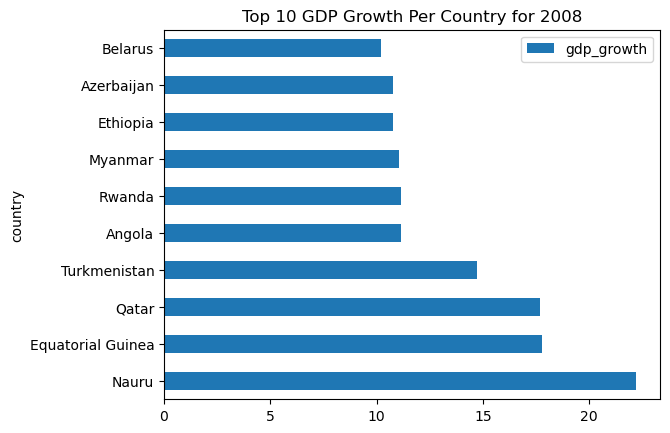

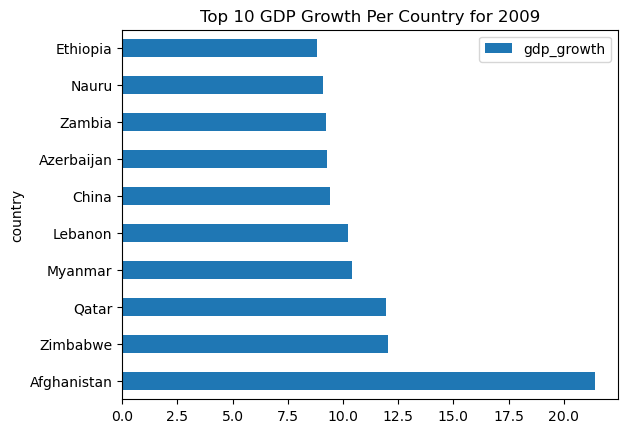

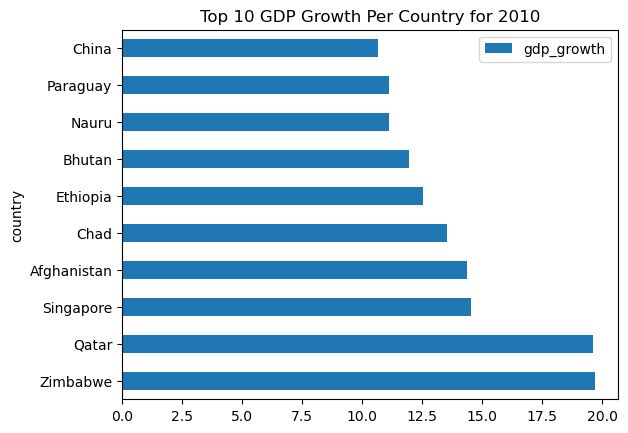

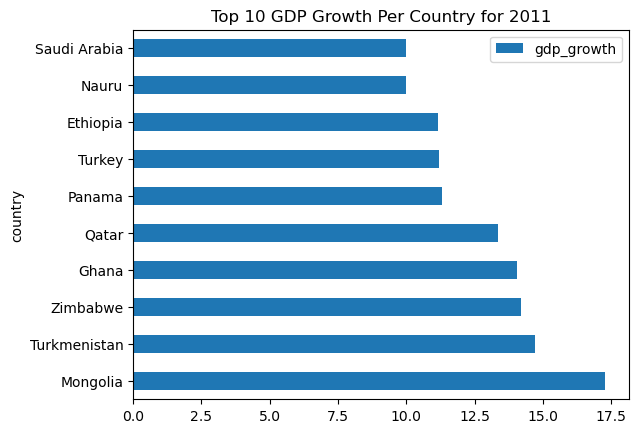

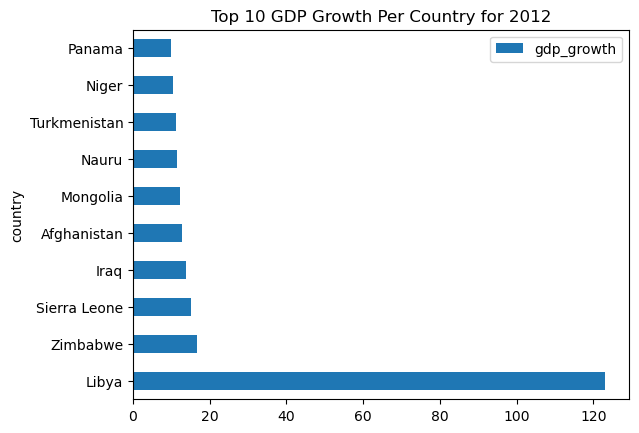

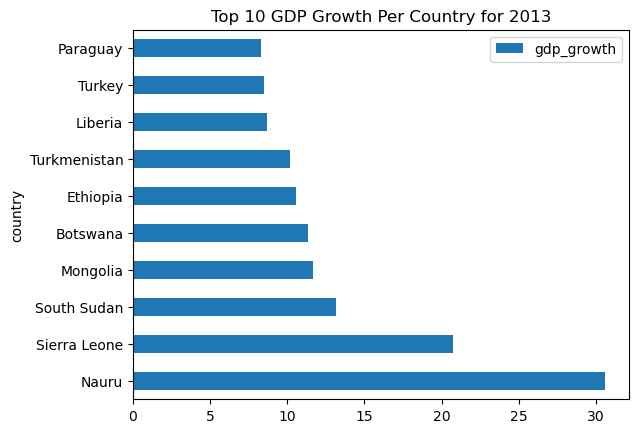

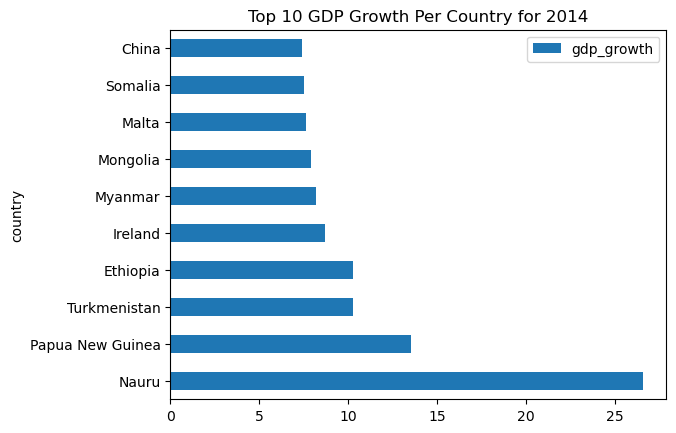

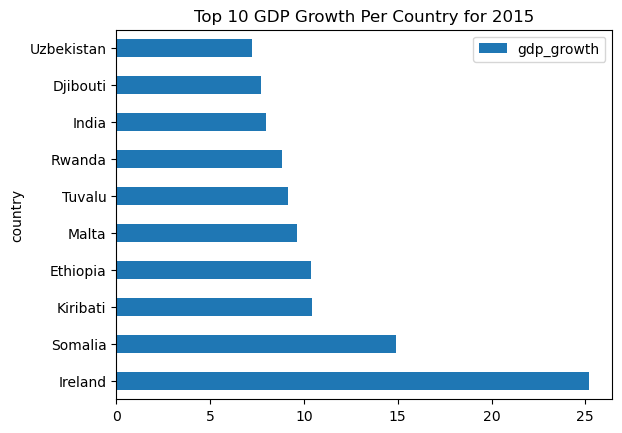

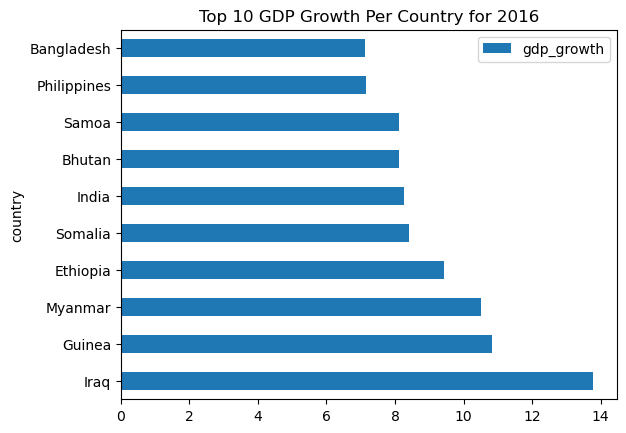

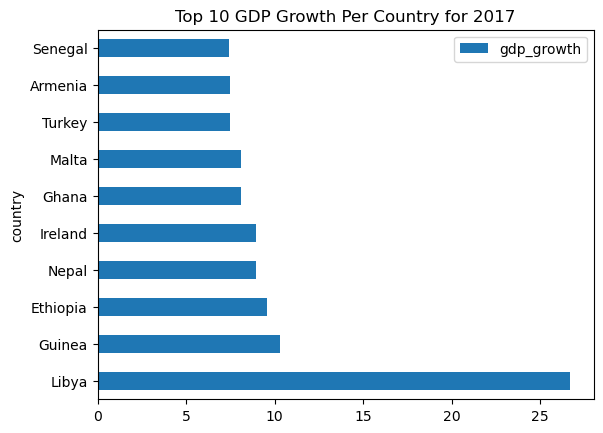

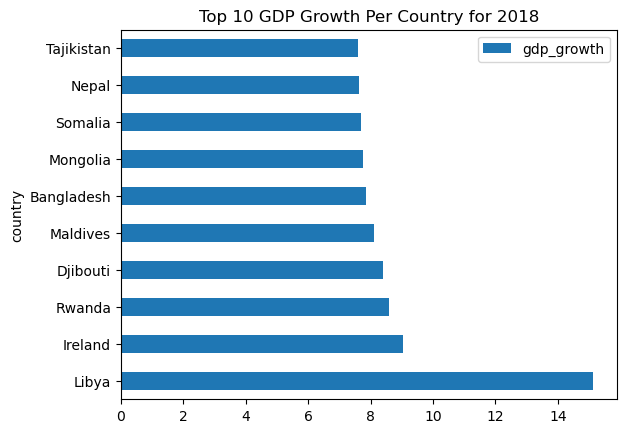

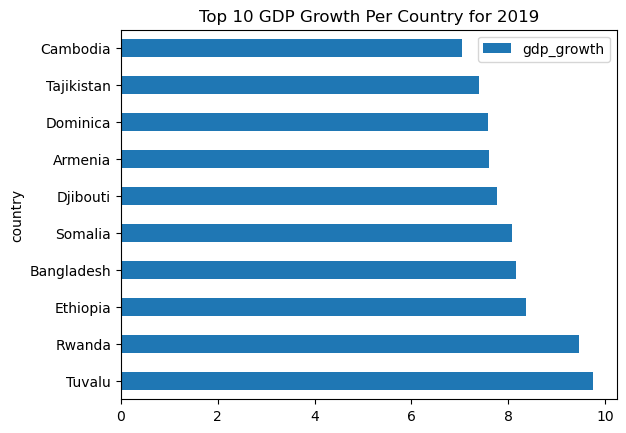

In [19]:
pop_elec_gdp_growth = dataset_without_2020.groupby(['year','country'])['gdp_growth'].sum().reset_index()
pop_elec_gdp_growth = pop_elec_gdp_growth.sort_values(by = 'gdp_growth', ascending = False)
for i in np.unique(pop_elec_gdp_growth['year'].values):
    print(i)
    pop_elec_gdp_growth[pop_elec_gdp_growth['year'] == i][:10].plot(kind='barh', x = 'country', y= 'gdp_growth', title=f'Top 10 GDP Growth Per Country for {i}')


In [20]:
##
## Note: This code isn't mine but it's a great way to visualize mapped data and seeing its change over time
## Plotly offers many interesting and beautiful graphs to make visualization easier and more robust
##
# Function to plot features on world map
def plot_world_map(column_name, df):
    fig = go.Figure()
    for year in range(2000, 2020):
        # Filter the data for the current year
        filtered_df = df[df['year'] == year]

        # Create a choropleth trace for the current year
        trace = go.Choropleth(
            locations=filtered_df['country'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',  # Use a different color scale for better contrast
            colorbar=dict(title=column_name),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False  # Set the trace to invisible initially
        )

        # Add the trace to the figure
        fig.add_trace(trace)

    # Set the first trace to visible
    fig.data[0].visible = True

    # Create animation steps
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},  # Set all traces to invisible
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)  # Set the label for each step
        )
        step['args'][0]['visible'][i] = True  # Set the current trace to visible
        steps.append(step)

    # Create the slider
    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "year: ", "font": {"size": 14}},  # Increase font size for slider label
    )]

    # Update the layout of the figure with increased size and change the template
    fig.update_layout(
        title_text=f'{column_name} Map with slider',  # Set the initial title
        title_font_size=24,  # Increase title font size
        title_x=0.5,  # Center the title
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,  # Set the height of the figure in pixels
        width=1000,  # Set the width of the figure in pixels
        font=dict(family='Arial', size=12),  # Customize font family and size for the whole figure
        margin=dict(t=80, l=50, r=50, b=50),  # Add margin for better layout spacing
        template='plotly_dark',  # Change the template to 'plotly_dark'
    )

    # Show the figure
    fig.show()

In [21]:
plot_world_map('population_access_to_electricity', dataset_without_2020)

In [22]:
plot_world_map('electricity_from_renewables_twh', dataset_without_2020)

In [23]:
plot_world_map('value_co2_emissions_kt_by_country', dataset_without_2020)

## 3. Data Cleaning
We didn't have much cleaning to do besides renaming columns and removing rows for the year 2020 since there were so many missing values that impact our findings.

1. Renamed all of the columns, removed special characters and spaces
2. Removed all rows where year == 2020
3. Modified the `population_density_sqkm` from a string object to a float

## 4. Key Findings
In our research above we've found a few interesting things:
1. CO2 emissions are rising (almost) every year
2. The countries emitting the most CO2 do not necessarily have a higher GDP growth (i.e factories and a big energy industry could contribute)
3. Every single year the percentage of people with access to electricity is rising (generally)


## 5. Hypotheses
We'll now make 3 hypotheses about the data.

- <strong>&thinsp;H<sub>0</sub></strong>: Countries who generate more electricity from renewables emit less CO2
- <strong>&thinsp;H<sub>1</sub></strong>: Countries who generate more electricity from renewables do not emit less CO2
- <strong>&thinsp;H<sub>2</sub></strong>: Countries who generate more electricity from renewables and nuclear power emit less CO2

For these we'll focus on the latest year we've included in our set, 2019.

In [24]:
dataset_2019 = dataset_without_2020[dataset_without_2020['year'] == 2019]


In [25]:
dataset_2019 = dataset_2019.fillna(0)[['country', 'electricity_from_nuclear_twh' ,'electricity_from_renewables_twh', 'value_co2_emissions_kt_by_country', 'low_carbon_electricity_percentage']]

In [26]:
dataset_2019 = dataset_2019.drop(dataset_2019[dataset_2019['value_co2_emissions_kt_by_country'] == 0.000000e+00].index)
dataset_2019 = dataset_2019.drop(dataset_2019[dataset_2019['electricity_from_renewables_twh'] == 0.00].index)
dataset_2019 = dataset_2019.drop(dataset_2019[dataset_2019['electricity_from_nuclear_twh'] == 0.00].index)


Testing <strong>&thinsp;H<sub>0</sub></strong>

In [27]:
alpha=0.05
# Testing for just renewables
t_value1, p_value1 = stats.ttest_ind(dataset_2019['electricity_from_renewables_twh'], dataset_2019['value_co2_emissions_kt_by_country'])
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  -2.073675554974662 , p_value1 =  0.04328027545668481


In [28]:
# Testing for just nuclear
t_value2, p_value2 = stats.ttest_ind(dataset_2019['electricity_from_nuclear_twh'], dataset_2019['value_co2_emissions_kt_by_country'])
p_value_onetail=p_value2/2
print("t_value2 = ",t_value2, ", p_value2 = ", p_value2)

t_value2 =  -2.0739268881995407 , p_value2 =  0.04325594080004703


In [29]:
# testing for both
nuclear_renewables_sum = dataset_2019['electricity_from_renewables_twh'] + dataset_2019['electricity_from_nuclear_twh']
t_value3, p_value3 = stats.ttest_ind(nuclear_renewables_sum, dataset_2019['value_co2_emissions_kt_by_country'])
print("t_value3 = ",t_value3, ", p_value3 = ", p_value3)

t_value3 =  -2.073470886477858 , p_value3 =  0.04330010072955813


In [30]:
if (p_value1 < 0.05):
    print('Reject the null hypothesis (and H2), that countries who generate more electricity from renewables emit less CO2')
else:
    print('Accept the null hypothesis, that countries who generate more electricity from renewables emit less CO2')

Reject the null hypothesis (and H2), that countries who generate more electricity from renewables emit less CO2


As we can see, countries that generate more energy from renewables are necessarily emitting less CO2.

This could of course be due to various factors, we could make assumptions that countries that generate more electricity from renewables (including nuclear) are also more industrializd, though this is a hypothesis we'll need to confirm with additional data.

## 6. The next steps
Other correlations can be found in the data such as analyzing energy consumption and GDP, energy generation and access to energy sources per person

Moreover, there's the following potential use cases:
- Energy Consumption Prediction: Predict future energy usage, aid planning, and track SDG 7 progress.
- Carbon Emission Forecasting: Forecast CO2 emissions, support climate strategies.
- Energy Access Classification: Categorize regions for infrastructure development, understand sustainable energy's role.
- Sustainable Development Goal Tracking: Monitor progress towards Goal 7, evaluate policy impact.
- Energy Equity Analysis: Analyze access, density, and growth for equitable distribution.
- Energy Efficiency Optimization: Identify intensive areas for environmental impact reduction.
- Renewable Energy Potential Assessment: Identify regions for green investments based on capacity.
- Renewable Energy Investment Strategies: Guide investors towards sustainable opportunities.

## 7. Summary
The data is in pretty good shape, some cleaning was required to get stuff going for our specific case but overall, it's a high quality data set that has potential to be useful for a various regression purposes (to some extent).

Data for the years 2020 and onwards is lacking, entries for the missing CO2 emissions for 2020 and the fact we dont have data for 2021, 2022 and 2023 will greatly impact predictions, hypotheses and assumptions 